<a href="https://colab.research.google.com/github/bindu-25/Heart-Disease-Classification/blob/Python-file/Copy_of_MAJOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification

DATA DESCRIPTION
The dataset used in this article is the Cleveland Heart Disease dataset taken from
the UCI repository. The
dataset consists of 76 attributes. There are 14 columns in the dataset, which are
described below:
1) Age- displays the individual's age.
2) Sex-displays the gender of the individual using the following format:
1=male
0=female
3) Chest-pain type(cp)-displays the type of chest pain experienced by the
individual using the following format:
1=typical angina
2=atypical angina
3=non-anginal pain
4=asymptotic
4) Resting blood pressure(trestbps)-displays the resting blood pressure value
of an individual in mm Hg (unit).
5) Serum cholesterol (chol)- displays the serum cholesterol in mg/dl(unit).
6) Fasting blood sugar(fbs)- compares an individual's fasting blood sugar
value with 120mg/dl.
If fasting blood sugar>120mg/dl then: 1 [true]
Else: 0 [false]
7) Resting ECG(restecg)-displays resting electrocardiographic results
0=normal
1=having ST-T wave abnormality
2=left ventricular hypertrophy
8) Max heart rate achieved(thalach)-displays the max heart rate achieved by
an individual.
9) Exercised induced angina(exang)-3
1=yes
0=no
10) ST depression induced by exercise relative to rest(Oldpeak)-displays
the value which is an integer or float.
11) Peak exercise ST segment(Slope)-
1 = upsloping
2=flat
3=downsloping
12) Number of major vessels colored by fluoroscopy(Ca)-displays the
value as integer or float.
13) thal-displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect
14) Diagnosis of heart disease (num)-displays whether the individual is
suffering from heart disease or not:
Value 0: <50% diameter narrowing
Value 1: >50% diameter narrowing

ALGORITHM
Numerous modules, packages, and classifiers are used in this project. The
following Machine learning algorithms /classifiers are utilized on the dataset:
● Numpy as np

● Pandas as pd

● Matplotlib as plt

● Seaborn as sns

● Sklearn.model_selection for
train_test_split

● Sklearn.linear_model for Logistic regression

● Sklearn.metrics for accuracy_score

● Sklearn.preprocessing for StandardScaler

● Sklearn.metrics for classification_report

● Sklearn.neighbors for KNeighborsClassifier

● Sklearn.svm for SVC

● Sklearn.naive_bayes for GaussianNB

● Sklearn.tree for DecisionTreeClassifier

● Sklearn.ensemble for RandomForestClassifier

● sklearn.metrics for confusion_matrix, accuracy_score

● xgboost for XGBClassifier



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print("(Rows, columns): " + str(df.shape))
column=df.columns

(Rows, columns): (303, 14)


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df['target'].value_counts()

,count
target,
1,165
0,138


<Axes: >

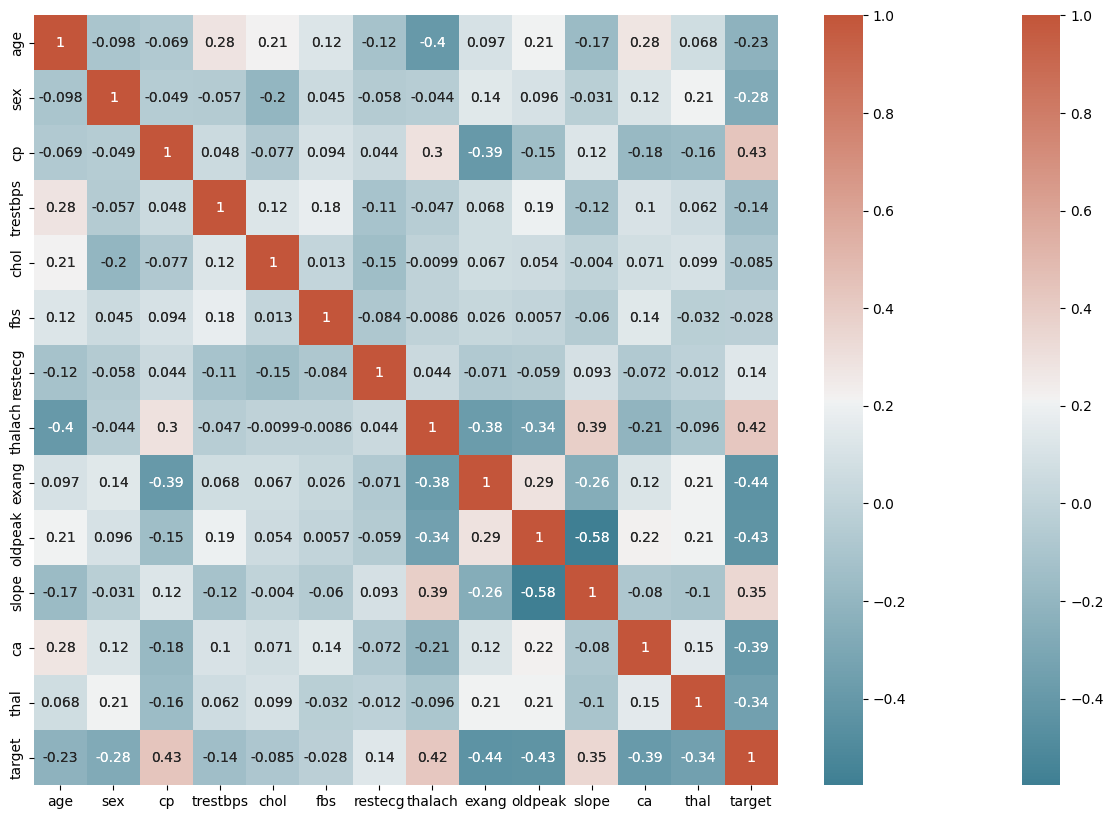

In [10]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

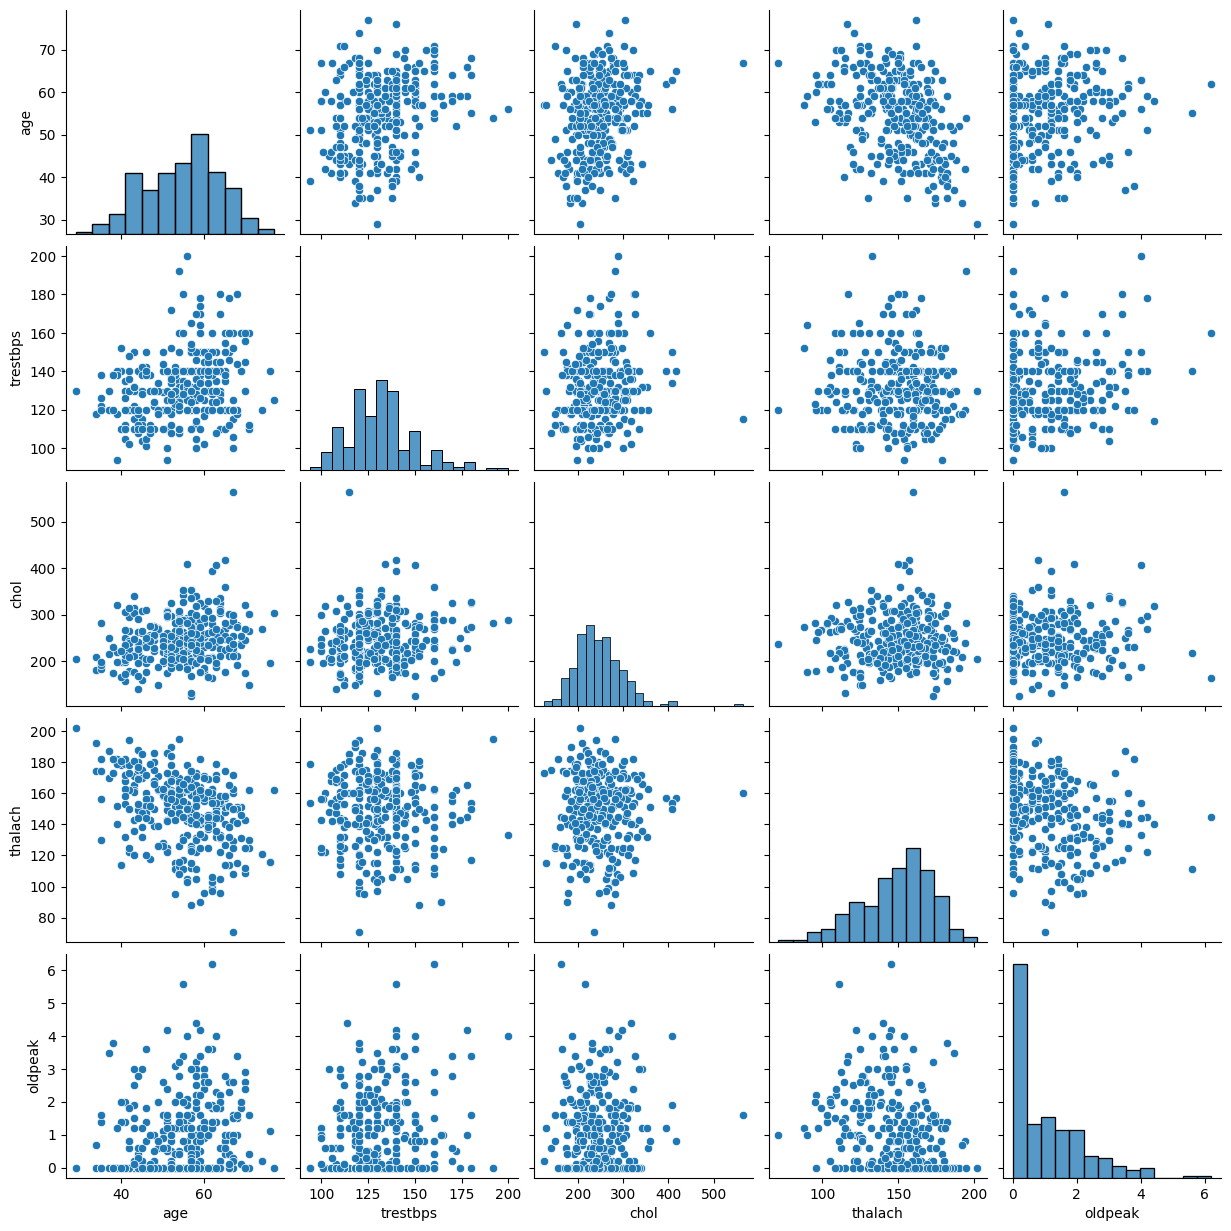

In [11]:
subData = df[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)


Text(36.804208333333335, 0.5, 'ST depression')

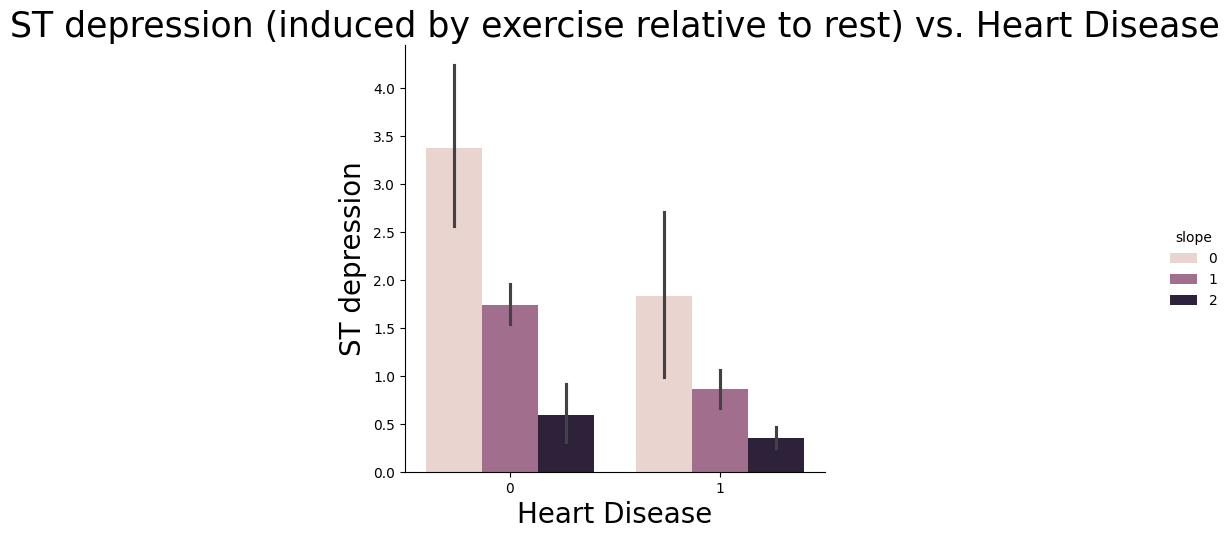

In [12]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=df);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

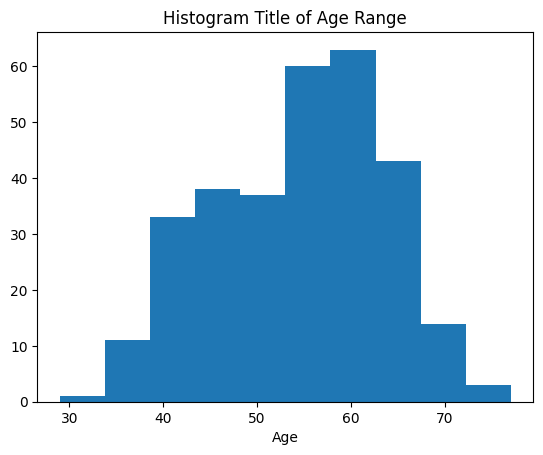

In [13]:
plt.hist(df['age'])
plt.title("Histogram Title of Age Range")
plt.xlabel('Age')
plt.show()

Text(0, 0.5, 'Thalach Level')

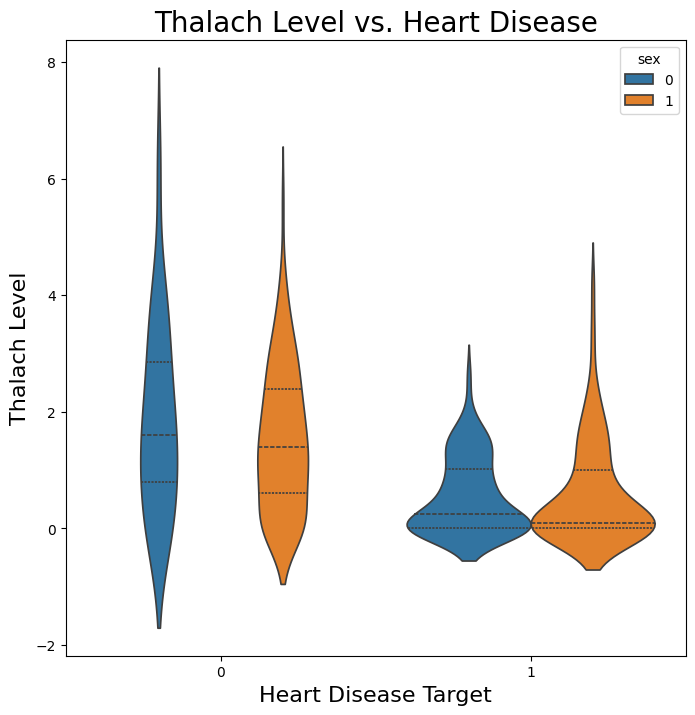

In [14]:
plt.figure(figsize=(8,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= df )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)


Text(0, 0.5, 'ST depression induced by exercise relative to rest')

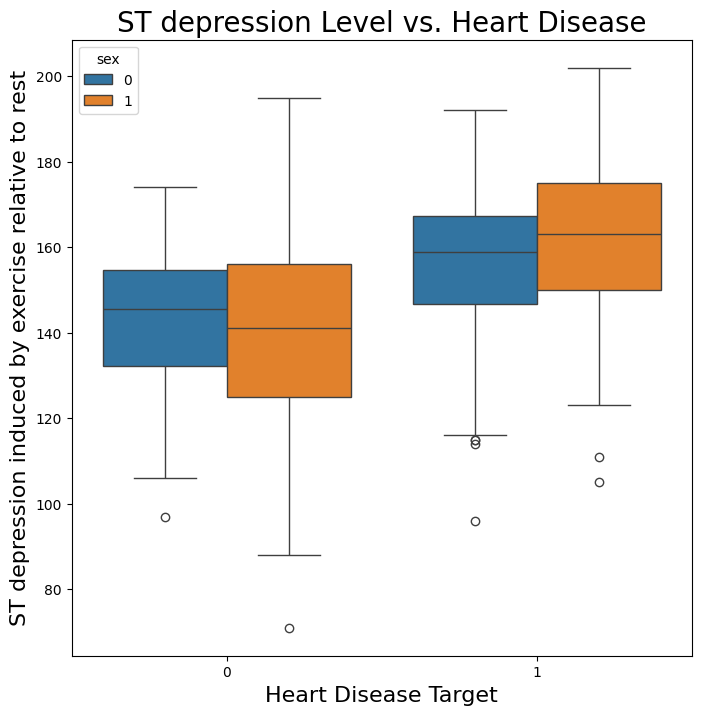

In [15]:
plt.figure(figsize=(8,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=df )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)


In [16]:
# Filtering data by positive Heart Disease patient
pos_data = df[df['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [17]:
# Filtering data by negative Heart Disease patient
neg_data = df[df['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [18]:

print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))


print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))



(Positive Patients ST depression): 0.583030303030303
(Negative Patients ST depression): 1.5855072463768116
(Positive Patients thalach): 158.46666666666667
(Negative Patients thalach): 139.1014492753623


In [19]:
# Split: the dataset into the Training set and Test set

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)





In [20]:

# We will now Train various Classification Models on the Training set & see which yields the highest accuracy.
# We will compare the accuracy of Logistic Regression, K-NN, SVM, Naives Bayes Classifier, Decision Trees, Random Forest, and XGBoost. Note: these are all supervised learning models.

# Model 1: Logistic Regression

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model

y_pred1 = model1.predict(x_train) # get y predictions
print(classification_report(y_pred1, y_train)) # output accuracy


# Model 2: K-NN (K-Nearest Neighbors)
#we are importing classification_report from sklearn.metrics
#then importing KNeighborsclassifier from sklearn.neighbors
#then get the instance model from KNeighborsclassifier and store it in variable model2
#now fit the train model,after fitting get the y predictions using x_train
#finally get the output accuracy through classification_report

from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model

y_pred2 = model2.predict(x_test) # get y predictions
Y_pred2=classification_report(y_test, y_pred2) # output accuracy
print(Y_pred2)

# Model 3: SVM (Support Vector Machine)

from sklearn.metrics import classification_report
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model

y_pred3 = model3.predict(x_test) # get y predictions
Y_pred3=classification_report(y_test, y_pred3) # output accuracy
print(Y_pred3)

# Model 4:  Naives Bayes Classifier

from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model

y_pred4 = model4.predict(x_test) # get y predictions
Y_pred4=classification_report(y_test, y_pred4) # output accuracy
print(Y_pred4)

# Model 5: Decision Trees


from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model

y_pred5 = model5.predict(x_test) # get y predictions
Y_pred5=classification_report(y_test, y_pred5) # output accuracy
print(Y_pred5)

# Model 6: Random Forest

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

# Model 7:  XGBoost

from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test) # get y predictions
Y_pred7=classification_report(y_test, y_pred7) # output accuracy
print(Y_pred7)



              precision    recall  f1-score   support

           0       0.82      0.87      0.85       102
           1       0.90      0.86      0.88       140

    accuracy                           0.87       242
   macro avg       0.86      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

              preci

In [21]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost', 'Naives Bayes','Decision Trees'], 'Accuracy': [0.87*100,
                    0.75*100,0.75*100,0.77*100, 0.69*100, 0.80*100,0.69*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,87.0
1,Random Forest,75.0
2,K-Nearest Neighbour,75.0
3,Support Vector Machine,77.0
4,Extreme Gradient Boost,69.0
5,Naives Bayes,80.0
6,Decision Trees,69.0


In [22]:
#In above all the models we got higher accuracy in model1(LogisticRegression)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred1)
print(cm)
print("Higher Accuracy with  LogisticRegression: 86%")
accuracy_score(y_train, y_pred1)

[[ 89  19]
 [ 13 121]]
Higher Accuracy with  LogisticRegression: 86%


0.8677685950413223

In [23]:
# Predictions

# Scenario: A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm.
#
# He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110.
#
# In addition he has a serum cholestoral of 230 mg/dl.
#
# He is fasting blood sugar > 120 mg/dl.
#
# He has a resting electrocardiographic result of 1.
#
# The patients maximum heart rate achieved is 140.
#
# Also, he was exercise induced angina.
#
# His ST depression induced by exercise relative to rest value was 2.2.
#
# The slope of the peak exercise ST segment is flat.
#
# He has no major vessels colored by fluoroscopy,
# and in addition his maximum heart rate achieved is a reversable defect.
#
# Based on this information, can you classify this patient with Heart Disease?

print(model1.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))


# Yes! Our machine learning algorithm has classified this patient with Heart Disease. Now we can properly diagnose him, & get him the help he needs to recover. By diagnosing him early, we may prevent worse symtoms from arising later.

# Predicting the Test set results:
#
# First value represents our predicted value,
# Second value represents our actual value.
#
# If the values match, then we predicted correctly.
# We can see that our results are very accurate!

y_pred=model1.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[1]
[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


In [24]:
import pickle as pkl
pkl.dump(model1,open("final_model.py","wb"))



In [25]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

1.6.1


In [26]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

  Using cached pyngrok-4.1.1-py3-none-any.whl
  Attempting uninstall: pyngrok
    Found existing installation: pyngrok 7.3.0
    Uninstalling pyngrok-7.3.0:
      Successfully uninstalled pyngrok-7.3.0


In [27]:
%%writefile healthy-heart-app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
#Load the saved model
model=pkl.load(open("final_model.py","rb"))

st.set_page_config(page_title="Quick Heart Checker App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")



def preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal ):


    # Pre-processing user input
    if sex=="male":
        sex=1
    else: sex=0


    if cp=="Typical angina":
        cp=0
    elif cp=="Atypical angina":
        cp=1
    elif cp=="Non-anginal pain":
        cp=2
    elif cp=="Asymptomatic":
        cp=2

    if exang=="Yes":
        exang=1
    elif exang=="No":
        exang=0

    if fbs=="Yes":
        fbs=1
    elif fbs=="No":
        fbs=0

    if slope=="Upsloping: better heart rate with excercise(uncommon)":
        slope=0
    elif slope=="Flatsloping: minimal change(typical healthy heart)":
          slope=1
    elif slope=="Downsloping: signs of unhealthy heart":
        slope=2

    if thal=="fixed defect: used to be defect but ok now":
        thal=6
    elif thal=="reversable defect: no proper blood movement when excercising":
        thal=7
    elif thal=="normal":
        thal=2.31

    if restecg=="Nothing to note":
        restecg=0
    elif restecg=="ST-T Wave abnormality":
        restecg=1
    elif restecg=="Possible or definite left ventricular hypertrophy":
        restecg=2


    user_input=[age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction




    # front end elements of the web page
html_temp = """
    <div style ="background-color:white;padding:13px">
    <h1 style ="color:black;text-align:center;">Quick Heart Checker App</h1>
    </div>
    """

# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True)

# following lines create boxes in which user can enter data required to make prediction
age=st.selectbox ("Age",range(1,121,1))
sex = st.radio("Select Gender: ", ('male', 'female'))
cp = st.selectbox('Chest Pain Type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic"))
trestbps=st.selectbox('Resting Blood Sugar',range(1,500,1))
restecg=st.selectbox('Resting Electrocardiographic Results',("Nothing to note","ST-T Wave abnormality","Possible or definite left ventricular hypertrophy"))
chol=st.selectbox('Serum Cholestoral in mg/dl',range(1,1000,1))
fbs=st.radio("Fasting Blood Sugar higher than 120 mg/dl", ['Yes','No'])
thalach=st.selectbox('Maximum Heart Rate Achieved',range(1,300,1))
exang=st.selectbox('Exercise Induced Angina',["Yes","No"])
oldpeak=st.number_input('Oldpeak')
slope = st.selectbox('Heart Rate Slope',("Upsloping: better heart rate with excercise(uncommon)","Flatsloping: minimal change(typical healthy heart)","Downsloping: signs of unhealthy heart"))
ca=st.selectbox('Number of Major Vessels Colored by Flourosopy',range(0,5,1))
thal=st.selectbox('Thalium Stress Result',range(1,8,1))



#user_input=preprocess(sex,cp,exang, fbs, slope, thal )
pred=preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal)




if st.button("Predict"):
  if pred[0] == 0:
    st.error('Warning! You have high risk of getting a heart attack!')

  else:
    st.success('You have lower risk of getting a heart disease!')





st.sidebar.subheader("About App")

st.sidebar.info("This Web App is created by the students of DataScience Batch of SkillVertex")
st.sidebar.info("This web app is helps you to find out whether you are at a risk of developing a heart disease.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a healthy heart")
st.sidebar.info("Don't forget to rate this app")



feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=5,step=1)

if feedback:
  st.header("Thank you for rating the app!")
  st.info("Caution: This is just a prediction and not doctoral advice. Kindly see a doctor if you feel the symptoms persist.")


Overwriting healthy-heart-app.py
